# Positive Predictive Values

8 March 2022

---

Including:
- How they are calculated
- How confidence intervals calculated

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
%matplotlib inline

## Generate some data

In [4]:
# two distributions: one for nosie, one for signal
sigma_noise = 10
signal_noise = 3

signal_mean = 15
sample_size = 2**16

noise = sigma_noise * np.random.randn(sample_size)
signal = signal_noise * np.random.randn(sample_size) + signal_mean

labels = np.concatenate([np.zeros(sample_size), np.ones(sample_size)])

In [5]:
data = pd.DataFrame(data={'value': np.concatenate([noise, signal]), 'label': labels})

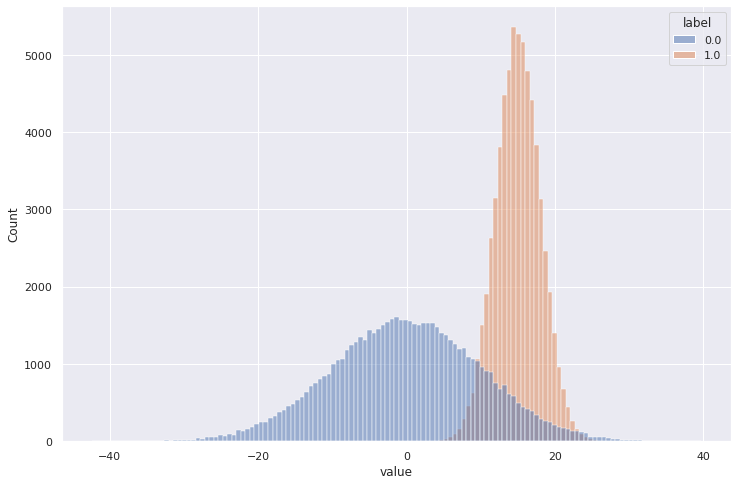

In [6]:
plt.figure(figsize=(12, 8))
sns.histplot(data=data, x='value', hue='label')
plt.show()

In [56]:
# prevalence
prev = 1 / 10

# threshold
threshold = 10

# num trials
M = 2**16

# num samples in each trial
N = 2**11

# randomly choose the appropriate amounts from signal and noise
N_signal = int(N * prev)
N_noise = N - N_signal

# choose randomly from each of the distributions
noise = sigma_noise * np.random.randn(N_noise, M)
signal = signal_noise * np.random.randn(N_signal, M) + signal_mean

In [57]:
# calculate TP, FP, TN, FN
TP = (signal > threshold).sum(axis=0).reshape(1, -1)
FP = (noise > threshold).sum(axis=0).reshape(1, -1)

TN = (noise < threshold).sum(axis=0).reshape(1, -1)
FN = (signal < threshold).sum(axis=0).reshape(1, -1)

In [58]:
ppv = TP / (TP + FP)

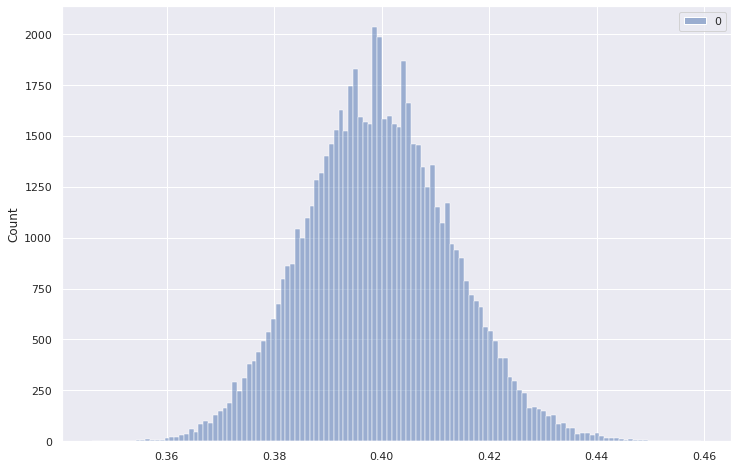

In [59]:
plt.figure(figsize=(12, 8))
sns.histplot(ppv.reshape(-1, 1))
plt.show()

In [60]:
np.sqrt(np.var(ppv))

0.013487029945381302

In [63]:
ci0, mu, ci1 = np.mean(ppv) - 1.96 * np.sqrt(np.var(ppv)), np.mean(ppv), np.mean(ppv) + 1.96 * np.sqrt(np.var(ppv))

In [66]:
((ci0 < ppv) & (ppv < ci1)).mean()

0.95074462890625

In [67]:
1 / np.sqrt(N)

0.022097086912079608